# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).


Let's step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. Here are the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [47]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

Check out the DataFrames. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [6]:
# Shape
print(f'The shape of df_yearly is {df_yearly.shape}, with {df_yearly.shape[0]} rows and {df_yearly.shape[1]} columns.')
print(f'The shape of df_monthly is {df_monthly.shape}, with {df_monthly.shape[0]} rows and {df_monthly.shape[1]} columns.')

The shape of df_yearly is (12, 4), with 12 rows and 4 columns.
The shape of df_monthly is (98, 3), with 98 rows and 3 columns.


In [8]:
# Column names
print(df_yearly.columns)
print(df_monthly.columns)

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Index(['date', 'births', 'deaths'], dtype='object')


In [10]:
# Which years are included
df_yearly.year.unique()

array([1841, 1842, 1843, 1844, 1845, 1846])

### Check for Nan Values and Duplicates

In [24]:
# NaN
print(f'The number of Nan in df_yearly is {df_yearly.isna().sum().sum()}.\n')
print(f'The number of Nan in df_monthly is {df_monthly.isna().sum().sum()}.\n')

print(f'The number of Duplicates in df_yearly is {df_yearly.duplicated().sum().sum()}.\n')
print(f'The number of Duplicates in df_monthly is {df_monthly.duplicated().sum().sum()}.')

The number of Nan in df_yearly is 0.

The number of Nan in df_monthly is 0.

The number of Duplicates in df_yearly is 0.

The number of Duplicates in df_monthly is 0.


### Descriptive Statistics

In [27]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [26]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [28]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [39]:
print(f"The percentage of women dying in childbirth in the 1840s was {'{:.2f}%'.format(df_yearly.deaths.sum() / df_yearly.births.sum() * 100)}.")

The percentage of women dying in childbirth in the 1840s was 7.08%.


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes.

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

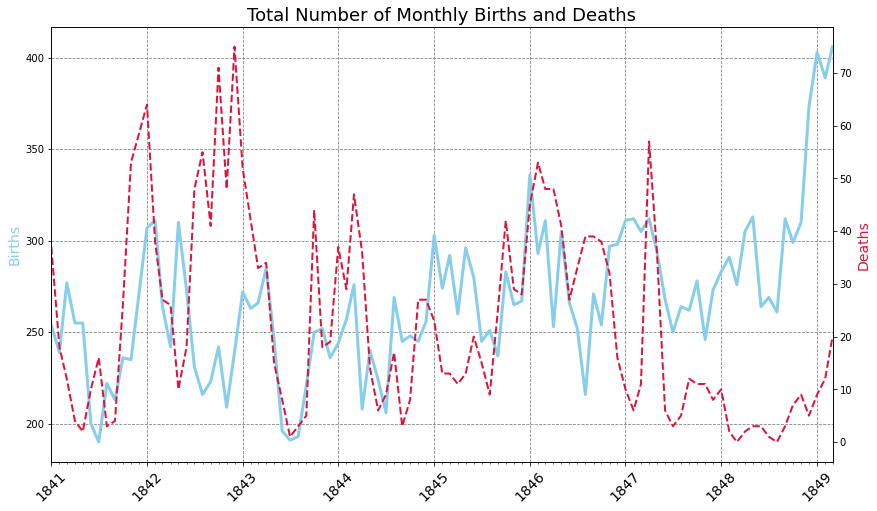

In [66]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.title("Total Number of Monthly Births and Deaths", fontsize=18)

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.set_ylabel('Births', color='skyblue', fontsize=14)
ax2.set_ylabel('Deaths', color='crimson', fontsize=14)

ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths, linestyle='--', color='crimson', linewidth=2)

ax1.grid(linestyle='--', color='grey')

plt.show()

Something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births.

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [164]:
fig = px.line(df_yearly, 'year', 'births', color='clinic', title='Total Yearly Births by Clinic')
fig.show()

We see that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

In [73]:
fig = px.line(df_yearly, 'year', 'deaths', color='clinic', title='Total Yearly Deaths by Clinic')
fig.show()

We also see that, not only were more people born in clinic 1, more people also died in clinic 1.

### Calculate the Proportion of Deaths at Each Clinic

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [80]:
# Add a pct column
df_yearly['pct_deaths'] = 100 * df_yearly.deaths / df_yearly.births
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


In [82]:
# Avg maternal death rate per clinic
avg_death_rate_clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1'].deaths.sum() / df_yearly[df_yearly.clinic == 'clinic 1'].births.sum()
avg_death_rate_clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2'].deaths.sum() / df_yearly[df_yearly.clinic == 'clinic 2'].births.sum()

print(f'The average maternal death rate for clinic 1 is {100 * avg_death_rate_clinic_1:.2f}%.')
print(f'The average maternal death rate for clinic 2 is {100 * avg_death_rate_clinic_2:.2f}%.')

The average maternal death rate for clinic 1 is 9.92%.
The average maternal death rate for clinic 2 is 3.88%.


### Plotting the Proportion of Yearly Deaths by Clinic

In [79]:
fig = px.line(df_yearly, 'year', 'pct_deaths', color='clinic', title='Yearly Death Percentage by Clinic')
fig.show()

1842 was a rough year. About 16% of women died in clinic 1 and about 7.6% of women died in clinic 2.

Still, clinic 2 had a consistently lower death rate than clinic 1.

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [109]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1847.
* Calculate the average death rate after June 1847.

In [110]:
df_monthly['pct_deaths'] = 100 * df_monthly.deaths / df_monthly.births
df_monthly.sample(5)

,date,births,deaths,pct_deaths
53,1845-07-01,245,15,6.12
44,1844-10-01,248,8,3.23
25,1843-03-01,266,33,12.41
92,1848-10-01,299,7,2.34
3,1841-04-01,255,4,1.57


In [111]:
df_pre_wash = df_monthly[df_monthly.date < handwashing_start]
df_post_wash = df_monthly[df_monthly.date >= handwashing_start]

In [112]:
print(f'The average death rate before washing hands was ordered is {df_pre_wash.pct_deaths.mean():.1f}%.')
print(f'The average death rate after washing hands was ordered is {df_post_wash.pct_deaths.mean():.1f}%.')

The average death rate before washing hands was ordered is 10.5%.
The average death rate after washing hands was ordered is 2.1%.


### Calculate a Rolling Average of the Death Rate

Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

In [113]:
roll_df = df_pre_wash.set_index('date').rolling(window=6).mean()
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,nan,nan,nan
1841-02-01,nan,nan,nan
1841-03-01,nan,nan,nan
1841-04-01,nan,nan,nan
1841-05-01,nan,nan,nan
...,...,...,...
1847-01-01,274.50,29.00,11.13
1847-02-01,290.50,23.50,8.44
1847-03-01,296.17,18.83,6.64


### Highlighting Subsections of a Line Chart

Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). 

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

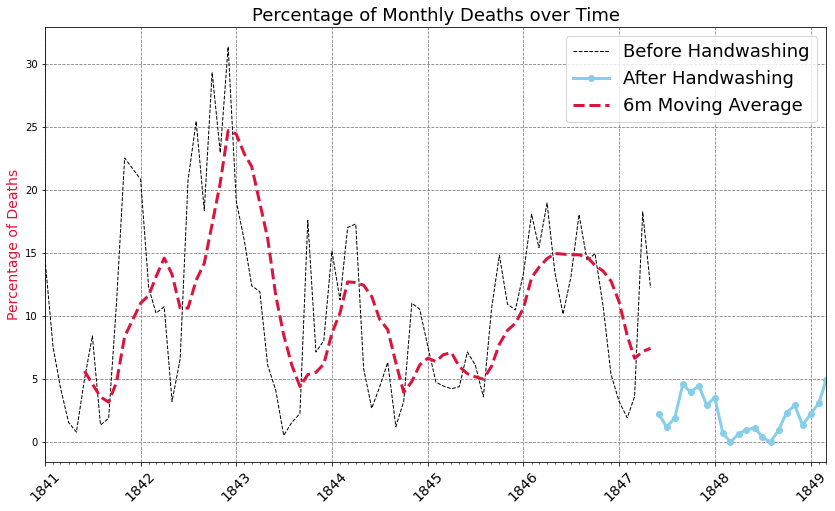

In [114]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.title("Percentage of Monthly Deaths over Time", fontsize=18)

ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax.set_ylabel('Percentage of Deaths', color='crimson', fontsize=14)


plt.plot(df_pre_wash.date, df_pre_wash.pct_deaths, color='black', linewidth=1, linestyle='--', label='Before Handwashing')
plt.plot(df_post_wash.date, df_post_wash.pct_deaths, marker='o', color='skyblue', linewidth=3, label='After Handwashing')
plt.plot(roll_df.index, roll_df.pct_deaths, color='crimson', linewidth=3, linestyle='--', label='6m Moving Average')

plt.grid(linestyle='--', color='grey')
plt.legend(fontsize=18)
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [121]:
print(f'The average percentage of monthly deaths before handwashing was {df_pre_wash.pct_deaths.mean():.1f}%.')
print(f'The average percentage of monthly deaths after mandatory handwashing was {df_post_wash.pct_deaths.mean():.1f}%.')
print(f'Handwashing reduced the average chance of dying in childbirth by {df_pre_wash.pct_deaths.mean() - df_post_wash.pct_deaths.mean():.1f}%.')
print(f'This is a {df_pre_wash.pct_deaths.mean() / df_post_wash.pct_deaths.mean():.0f}x improvement!')

The average percentage of monthly deaths before handwashing was 10.5%.
The average percentage of monthly deaths after mandatory handwashing was 2.1%.
Handwashing reduced the average chance of dying in childbirth by 8.4%.
This is a 5x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing
 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [132]:
df_monthly['before_handwashing_start'] = np.where(df_monthly.date >= handwashing_start, 'Yes', 'No')
df_monthly.sample(5)

,date,births,deaths,pct_deaths,before_handwashing_start
81,1847-11-01,246,11,4.47,Yes
39,1844-05-01,240,14,5.83,No
90,1848-08-01,261,0,0.00,Yes
93,1848-11-01,310,9,2.90,Yes
18,1842-08-01,216,55,25.46,No


In [136]:
boxplot = px.box(df_monthly, x='before_handwashing_start', y='pct_deaths', color='before_handwashing_start', title='How Have the Stats Changed with Handwashing?')
boxplot.update_layout(xaxis_title='Washing Hands?', yaxis_title='Percentage of Monthly Deaths')
boxplot.update_layout(showlegend=False)
boxplot.show()

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [147]:
histo = px.histogram(df_monthly, 
                     x='pct_deaths', 
                     color='before_handwashing_start', 
                     histnorm='percent', 
                     barmode='overlay',
                     opacity=0.6,
                     nbins=30, 
                     marginal='box', 
                     labels={"before_handwashing_start": "Washing Hands?"})
histo.update_layout(xaxis_title='Proportion of Monthly Deaths', 
                    yaxis_title='Count')
histo.show()

Now, we have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


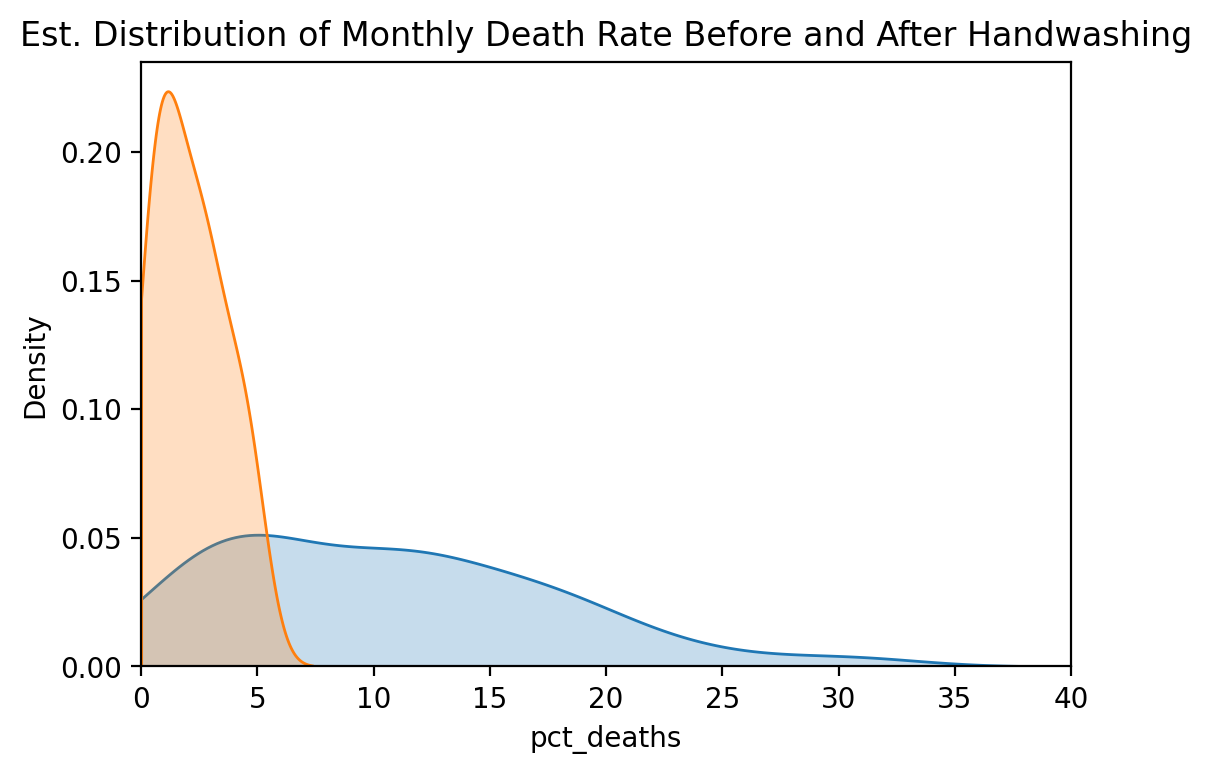

In [158]:
plt.figure(dpi=200)
sns.kdeplot(data=df_monthly, 
            x=df_pre_wash.pct_deaths, 
            shade=True, 
            clip=(0,100))
sns.kdeplot(data=df_monthly, 
            x=df_post_wash.pct_deaths, 
            shade=True, 
            clip=(0,100))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 40)
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.

### Use a T-Test to Show Statistical Significance

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [159]:
from scipy import stats

In [163]:
t_stat, p_value =stats.ttest_ind(df_pre_wash.pct_deaths, df_post_wash.pct_deaths)
print(f'p-value is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-value is 0.0000002985
t-statstic is 5.512


When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant.

What do you conclude from the analysis? Well, here is the way to wash your hands like a surgeon! 

<img src=https://i.imgur.com/rvjNVzQ.gif>